In [2]:
"""tanniki suriveried model built

"""

'tanniki suriveried model built\n\n'

In [24]:
import numpy as np
import pandas as pd

In [25]:
#load the dataset
train_data = pd.read_csv(r"C:/Users/HP/Desktop/kaggle/train.csv")
test_data=pd.read_csv(r"C:/Users/HP/Desktop/kaggle/test.csv")
#hebingshujumeiyouyisileba
dates=pd.concat([train_data,test_data],ignore_index="True")
dates.tail(5)
# print(id(train_data))
# print(id(test_data))
# print(id(dates))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [26]:
train_data.info()
test_data.info()
print(type(dates))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

### 进行数据的探索

In [27]:
train_data["Survived"].value_counts()#对值进行计数,可以探索单变量分布

0    549
1    342
Name: Survived, dtype: int64

In [28]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

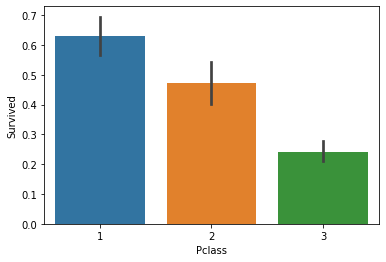

In [29]:
import plotly.express as express
import seaborn as sns

sns.barplot(x="Pclass", y="Survived", data=train_data)
# fig = express.histogram(data_frame=train_data, x="Pclass")
# #bar条形图用来解决分类问题
# fig=express.bar(data_frame=train_data, x="Pclass",y="Survived", 
#                 color="Pclass", 
#                 title="社会等级对于存的影响",
#                )#社会等级对于存活而言
# fig.show()

## 社会等级越高，生存几率越大

In [30]:
fig2=express.bar(data_frame=train_data, x="Sex",y="Survived",
           title="性别对于存活的影响")
fig3=express.histogram(data_frame=train_data,
                       x="Sex",
                      title="男女性别人数")
fig2.show()
fig3.show()

## 女性比男性更加容易存活

In [31]:
import plotly.express as express
#年龄对存活的印象
# fig4 = express.line(train_data, x="Age", y="Survived", title='年龄对生存印象')
# fig4.show()
#这里采用二维直方图来表述
fig4=express.density_heatmap(data_frame=train_data,x="Age",y="Survived",
                             title="年龄对生存的影响"
                            )
fig4.show()

## 20-40岁之间的人生存概率越高

AttributeError: 'AxesSubplot' object has no attribute 'show'

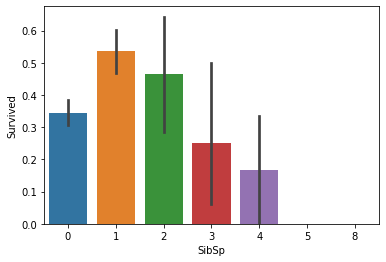

In [32]:
#Survived的取值只有0-1
fig5=express.histogram(data_frame=train_data, x="SibSp",y="Survived", color="SibSp",
                      title="亲属对生存的影响")
fig5.show()

fig6=express.bar(data_frame=train_data, x="SibSp", y="Survived",color="SibSp")
fig6.show()
ff1=sns.barplot(x="SibSp", y="Survived", data=train_data)
ff1.show()

## 拥有0-2位旁系亲属的人生存率更高

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

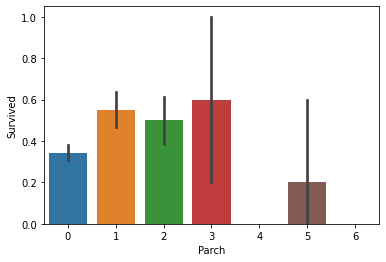

In [33]:
fig7=express.histogram(data_frame=train_data, x="Parch",y="Survived", color="Parch",
                      title="亲属对生存的影响")#进行分布的统计
fig7.show()
ff2=sns.barplot(x="Parch", y="Survived", data=train_data)
ff2

## 这个没办法说

In [34]:
#合并两种亲属作为一个家庭成员的大小
dates=pd.date_range(start="2021-1-1", periods=6)
s = pd.Series([1, 3, 5, np.nan, 6, 8])
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
# np.random.randn(6,4)
# df/
id(df)

1776439578336

In [35]:
df["E"]=df["C"]+df["D"]#这是新增一列
df#是同一个对象
id(df)

1776439578336

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:xlabel='Fmaily', ylabel='Survived'>

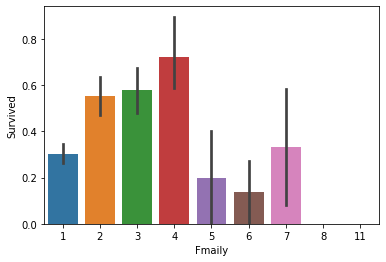

In [39]:
dates=pd.concat([train_data,test_data],ignore_index="True")
dates.tail(5)
print(type(dates))
dates["Fmaily"]=dates["SibSp"]+dates["Parch"]#每个值都有加的
dates["Fmaily"]=dates["Fmaily"]+1#数值规约,前面是将两个数据集进行合并了
# fig8=express.histogram(data_frame=train_data,x="Fmaily", color="Survived")
# # fig8.layout(bargap=0.2)
# fig8.show()
ff3 = sns.barplot(x="Fmaily", y="Survived", data=dates)
ff3

## [1-4]==[0--3]的存活率最高

In [40]:
#登录地方对生存的影响
#t条形图
fig9=express.bar(data_frame=train_data,x="Embarked",y="Survived",orientation="v")
fig9.show()

## S的存活率最高

In [41]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
dates.head()
# print(type(dates))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fmaily
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [43]:
#特征工程处理
#名称处理
### Miss, Mrs 女士， Mr男士，其他三个代标三个阶层
### 这里其实是做了层级的处理，先按找男女处理，分辨不来就按照阶层分
dates["Title"]=dates["Name"].apply(lambda x:x.split(",")[1].split(".")[0].strip())
dates["Title"].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'],"officer", inplace=True)
dates["Title"].replace(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty', inplace=True)
dates['Title'].replace(['Mme', 'Ms', 'Mrs'],'Mrs', inplace=True)
dates['Title'].replace(['Mlle', 'Miss'], 'Miss', inplace=True)
dates['Title'].replace(['Master','Jonkheer'],'Master', inplace=True)
dates['Title'].replace(['Mr'], 'Mr', inplace=True)

In [44]:
dates.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fmaily,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


<AxesSubplot:xlabel='Title', ylabel='Survived'>

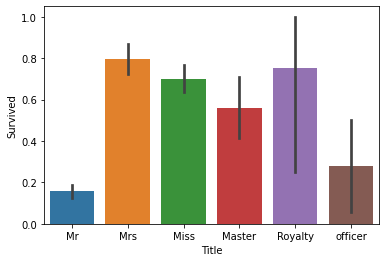

In [45]:
fig10=express.bar(data_frame=dates, x="Title",y="Survived",orientation="v")
fig10.show()
ff4=sns.barplot(x="Title", y="Survived", data=dates)
ff4

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Fmaily Title  Fam_size  \
0      0         A/5 21171   7.2500   NaN        S       2    Mr         2   
1      0          PC 17599  71.2833   C85        C       2   Mrs         2   
2      0  STON/O2. 3101282   7.9250   NaN        S       1  Miss         1   
3      0

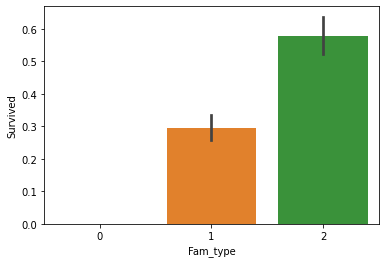

In [46]:
#对亲属进行分类指标的分类,存活率相同的分为一类
#sort
dates['Fam_size'] = dates['SibSp'] + dates['Parch'] + 1

dates.loc[dates['Fam_size']>7,'Fam_type']=0
dates.loc[(dates['Fam_size']>=2)&(dates['Fam_size']<=4),'Fam_type']=2
dates.loc[(dates['Fam_size']>4)&(dates['Fam_size']<=7)|(dates['Fam_size']==1),'Fam_type']=1
dates['Fam_type']=dates['Fam_type'].astype(np.int32)

ff5=sns.barplot(x="Fam_type", y="Survived", data=dates)
ff5
print(dates.head())

<AxesSubplot:xlabel='Board', ylabel='Survived'>

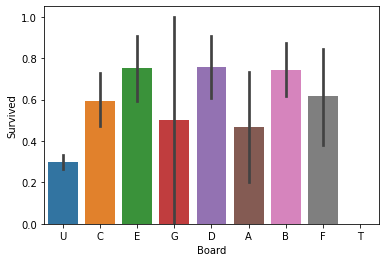

In [47]:
#舱门数据地处理,房间号的首字母也就是代表了它的房间等级
dates["Cabin"]=dates["Cabin"].fillna("U")#添补缺失值
dates["Board"]=dates["Cabin"].str.get(0)

fig12=express.bar(data_frame=dates, x="Board", y="Survived")
fig12.show()
ff6=sns.barplot(x="Board", y="Survived", data=dates)
ff6

<AxesSubplot:xlabel='TicketGroup', ylabel='Survived'>

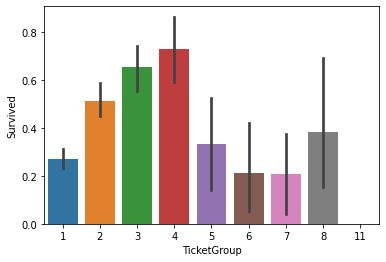

In [48]:
#票号的处理
dates["Ticket"].value_counts()#存在多个人拥有一张票的情况
# 假设票号可能与家庭有关
Ticket_count=dict(dates["Ticket"].value_counts())
dates["TicketGroup"]= dates['Ticket'].apply(lambda x:Ticket_count[x])#进行分组
# dates["TicketGroup"].value_counts()
fig13=express.bar(data_frame=dates, x="TicketGroup", y="Survived")
fig13.show()
ff7=sns.barplot(x='TicketGroup', y='Survived', data=dates)
ff7

In [49]:
#港口号码的处理
#dates["Embarked"].isnull()jiushiyigeseries
dates[dates["Embarked"].isnull()]
dates.groupby(by=["Pclass","Embarked"]).Fare.median()
dates["Embarked"].fillna("C")

0       S
1       C
2       S
3       S
4       S
       ..
1304    S
1305    C
1306    S
1307    S
1308    C
Name: Embarked, Length: 1309, dtype: object

In [54]:
#票价的处理
dates[dates['Fare'].isnull()]
fare=dates[(dates['Embarked'] == "S") & (dates['Pclass'] == 3)].Fare.median()
dates['Fare']=dates['Fare'].fillna(fare)

In [56]:
dates.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fmaily,Title,Fam_size,Fam_type,Board,TicketGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,2,Mr,2,2,U,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs,2,2,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1,Miss,1,1,U,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs,2,2,C,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1,Mr,1,1,U,1


In [60]:
#年龄的处理
#随机森林法填充缺失值
from sklearn.ensemble import RandomForestRegressor
ages = dates[['Age', 'Pclass','Sex','Title']]#取出多列
ages.info()
ages=pd.get_dummies(ages)#形成一个0-1矩阵
known_ages = ages[ages.Age.notnull()].values#yizhidenianlin
unknown_ages = ages[ages.Age.isnull()].values#weizhidenianling
y = known_ages[:, 0]#取第一列
X = known_ages[:, 1:]#取其他列
rfr = RandomForestRegressor(random_state=60, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)#这里进行随机森林填充
pre_ages = rfr.predict(unknown_ages[:, 1::])#进行预测
dates.loc[ (dates.Age.isnull()), 'Age' ] = pre_ages#进行填充

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1309 non-null   float64
 1   Pclass  1309 non-null   int64  
 2   Sex     1309 non-null   object 
 3   Title   1309 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 41.0+ KB


In [61]:
#异常值处理
dates['Surname']=dates['Name'].apply(lambda x:x.split(',')[0].strip())#查找性式
Surname_Count = dict(dates['Surname'].value_counts())#频次
dates['FamilyGroup'] = dates['Surname'].apply(lambda x:Surname_Count[x])#每一个surname对应的值进行分组

# #女性和孩子群体，男性成人群体
Female_Child_Group=dates.loc[(dates['FamilyGroup']>=2) & ((dates['Age']<=12) | (dates['Sex']=='female'))]#进行抽取
Male_Adult_Group=dates.loc[(dates['FamilyGroup']>=2) & (dates['Age']>12) & (dates['Sex']=='male')]#进行抽取

Text(0.5, 0, 'AverageSurvived')

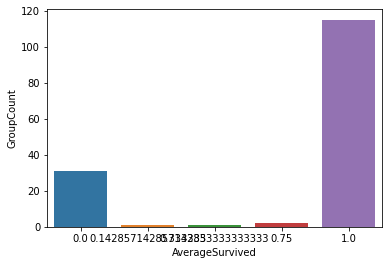

In [62]:
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']#替换列名
ff8=sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"]).set_xlabel('AverageSurvived')
ff8

In [63]:
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns=['GroupCount']
Male_Adult

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


In [64]:
#普遍规律：女性和儿童幸存率高，成年男性幸存较低
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)#死了那些人
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)#活了那些人

{'Danbom', 'Lobb', 'Barbara', 'Panula', 'Vander Planke', 'Rosblom', 'Olsson', 'Goodwin', 'Skoog', 'Ilmakangas', 'Canavan', 'Attalah', 'Johnston', 'Jussila', 'Arnold-Franchi', 'Boulos', 'Rice', 'Lefebre', 'Turpin', 'Strom', 'Zabour', 'Cacic', 'Lahtinen', 'Oreskovic', 'Ford', 'Bourke', 'Van Impe', 'Palsson', 'Robins', 'Sage', 'Caram'}
{'Beane', 'Kimball', 'Bradley', 'Nakid', 'Harder', 'Beckwith', 'Jonsson', 'Daly', 'Chambers', 'Jussila', 'Dick', 'Frolicher-Stehli', 'Greenfield', 'Cardeza', 'Bishop', 'Frauenthal', 'Taylor', 'McCoy', 'Duff Gordon', 'Goldenberg'}


In [65]:
dates.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fmaily,Title,Fam_size,Fam_type,Board,TicketGroup,Surname,FamilyGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,2,Mr,2,2,U,1,Braund,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs,2,2,C,2,Cumings,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1,Miss,1,1,U,1,Heikkinen,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs,2,2,C,2,Futrelle,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1,Mr,1,1,U,1,Allen,2


In [66]:
#对测试集中处于反常组中的样本的Age，Title，Sex进行惩罚修改。
train=dates.loc[dates['Survived'].notnull()]#训练集
test=dates.loc[dates['Survived'].isnull()]#测试集
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'

E:\360downloads\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
train.info()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Fmaily       891 non-null    int64  
 13  Title        891 non-null    object 
 14  Fam_size     891 non-null    int64  
 15  Fam_type     891 non-null    int32  
 16  Board        891 non-null    object 
 17  TicketGroup  891 non-null    int64  
 18  Surname      891 non-null    object 
 19  FamilyGr

In [70]:
dates=pd.concat([train, test])
dates.info()
dates=dates[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','Fam_type','Board','TicketGroup']]#选出需要的列
dates=pd.get_dummies(dates)#进行热编码
train=dates[dates['Survived'].notnull()]
test=dates[dates['Survived'].isnull()].drop('Survived',axis=1)#这里不是训练集吗
X = train.values[:,1:]
y = train.values[:,0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1307 non-null   object 
 12  Fmaily       1309 non-null   int64  
 13  Title        1309 non-null   object 
 14  Fam_size     1309 non-null   int64  
 15  Fam_type     1309 non-null   int32  
 16  Board        1309 non-null   object 
 17  TicketGroup  1309 non-null   int64  
 18  Surname      1309 non-null   object 
 19  Family

0.8081023720349563 1.01


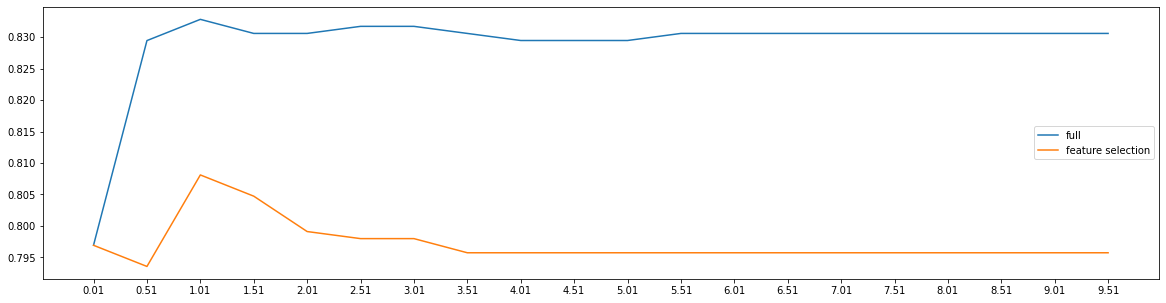

In [71]:
#使用逻辑回归进行建模
from sklearn.linear_model import LogisticRegression as LR#导入逻辑回归分类器
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel#特征选择
from sklearn.model_selection import cross_val_score#进行模型选择
from sklearn.ensemble import RandomForestClassifier#随机森林分类器

fullx = []
fsx = []

C=np.arange(0.01,10.01,0.5)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)#这就是模型
    fullx.append(cross_val_score(LR_,X,y,cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(X,y)
    fsx.append(cross_val_score(LR_,X_embedded,y,cv=10).mean())
    
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

0.8092259675405742 0.9850000000000004


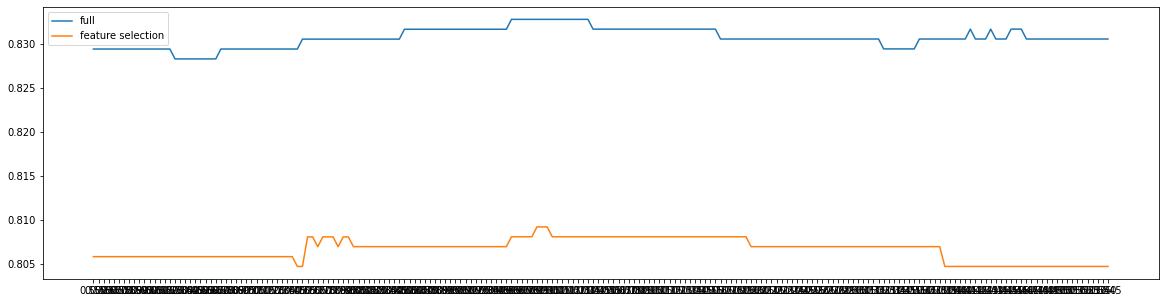

In [72]:
fullx = []
fsx = []
C=np.arange(0.55,1.55,0.005)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,X,y,cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(X,y)
    fsx.append(cross_val_score(LR_,X_embedded,y,cv=10).mean())
    
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

E:\360downloads\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

E:\360downloads\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



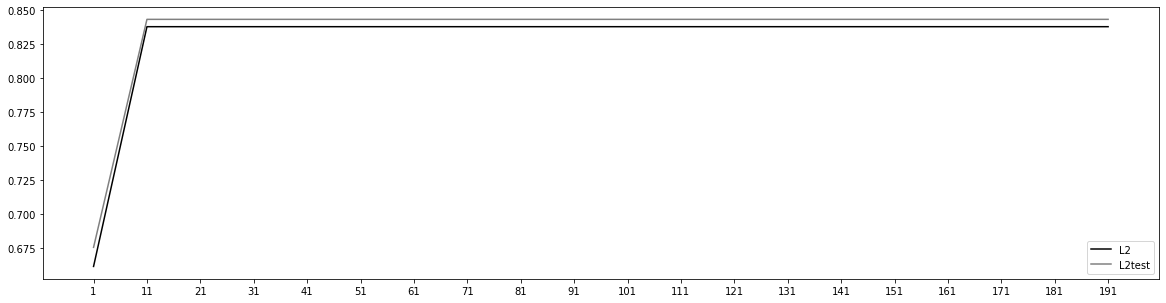

In [73]:
#找到最佳C值。带入到模型中
from sklearn.model_selection import train_test_split
l2 = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.9850000000000004,max_iter=i)#这里找到了最佳的C值
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]

plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

In [74]:
lr = LR(penalty="l2",solver="liblinear",C=0.9850000000000004,max_iter=200).fit(X,y)#这里模型就出来了
cross_val_score(lr,X,y,cv=10).mean()

0.8328089887640449

In [75]:
predictions = lr.predict(test)
test=pd.read_csv(r"C:/Users/HP/Desktop/kaggle/test.csv")#重新从文件中读取
PassengerId=test['PassengerId']#只是读取ID
prdict_test = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})#这里就的出了结果
prdict_test.to_csv("prdict_test.csv", index=False)

E:\360downloads\lib\site-packages\sklearn\base.py:438: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

